This notebook loads data of non-contributing areas in the Canadian Prairie region, and determines the fraction of basin area which is non-contributing (on average).  In particular, the fraction of non-contributing area is calculated for the stations in the eastern cluster of stations as identified in "Evaluation and interpretation of convolutional-recurrent networks for regional hydrological modelling".  The data is downloaded from:  
https://open.canada.ca/data/en/dataset/adb2e613-f193-42e2-987e-2cc9d90d2b7a

References:  
Anderson, S. and Radic, V.: Evaluation and interpretation of convolutional-recurrent networks for regional hydrological modelling, Hydrol. Earth Syst. Sci. Discuss. [preprint], https://doi.org/10.5194/hess-2021-113, in review, 2021.  
Government of Canada: Areas of Non-Contributing Drainage within Total Gross Drainage Areas of the AAFC Watersheds Project - 2013, [online] Available from: https://open.canada.ca/data/en/dataset/adb2e613-f193-42e2-987e-2cc9d90d2b7a, 2020.

In [2]:
#import libraries

import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
import os

In [3]:
#create list of unique filename prefixes in the .gdb folder (the same filename prefix will have .gdbtable, .gdptablx, .spx, and .gdbindexes)

dir_basins = '/Users/samanderson/repos/cnn_lstm_era/Data/HYD_AAFC_TOTAL_NON_CTRB_DRAIN.gdb/'

polygon_files = []
unique_filenames = []

for root, dirs, files in os.walk(dir_basins):
    for name in sorted(files):
        file = os.path.join(root,name)
        file_short = file.replace('/','.').split('.')[-2]
        polygon_files.append(file) #full path name of this file
        if file_short[0] == 'a':
            unique_filenames.append(file.replace('/','.').split('.')[-2])

unique_filenames = list(set(unique_filenames))

In [4]:
basin_files = [None] * len(unique_filenames)

for zz, filename in enumerate(unique_filenames): #for each unique file prefix

    #print statement every for keeping track
    print(str(zz+1) + '/' + str(len(unique_filenames)))

    #load one unique file
    basin = gpd.read_file(root + filename + '.gdbtable') #read in basin info
    basin_files[zz] = basin       

1/8
2/8
3/8
4/8
5/8
6/8
7/8
8/8


In [12]:
basins = basin_files[2] #this is the file with the basin data
basinIDs = basins['STATION_NUMBER']
basin_names = basins['STATION_NAME']
area_gross = basins['TOTAL_GROSS_SQKM_AREA']
area_effective = basins['TOTAL_EFFECTIVE_SQKM_AREA']
area_non = basins['TOTAL_NON_CONTRIB_SQKM_AREA']
frac_non = area_non / area_gross
geometry = basins['geometry']

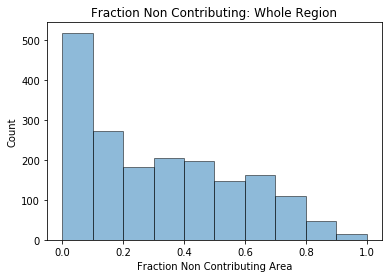

In [13]:
#visualize non-contributing areas across all basins

fig, ax = plt.subplots()
ax.hist(frac_non, alpha = 0.5, edgecolor = 'k')
ax.set_xlabel('Fraction Non Contributing Area')
ax.set_ylabel('Count')
ax.set_title('Fraction Non Contributing: Whole Region')
plt.show()

In [14]:
#basin IDs of stations in the eastern cluster
basins_eastern = ['05AH037', '05AH041', '05BM014', '05CB001', '05CB004', '05CC001', '05CC007',
 '05CC009', '05CC010', '05CD006', '05CE006', '05CE010', '05CE011', '05CE018',
 '05CK001', '05CK005', '05DF006', '05DF007', '05EA005', '05EC002', '05EC005',
 '05ED002', '05EE005', '05EE006', '05FA001', '05FB002', '05FC002', '05FE002',
 '05GA008', '06AA001', '06AA002', '07BB005', '07BC006', '11AA026']

In [15]:
eastern_non_area = np.zeros(len(basins_eastern))
eastern_effective = np.zeros(len(basins_eastern))
eastern_gross = np.ones(len(basins_eastern))
eastern_name = [None]*len(basins_eastern)
for kk, basin in enumerate(basins_eastern):
    inds = np.argwhere(basinIDs==basins_eastern[kk])
    for ind in inds: #some stations appear multiple times with slightly different gross areas; just take last value
        eastern_non_area[kk] = area_non[ind]
        eastern_effective[kk] = area_effective[ind]
        eastern_gross[kk] = area_gross[ind]
        eastern_name[kk] = basin_names[ind]
    
eastern_frac = eastern_non_area / eastern_gross

/Users/samanderson/anaconda3/envs/cnn_lstm_era/lib/python3.6/site-packages/numpy/core/fromnumeric.py:56: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return getattr(obj, method)(*args, **kwds)


In [16]:
print('Number of stations without non-contributing areas: ' + str(len(np.argwhere(eastern_frac==0))))
print('Min fraction of non-contributing areas:  ' + str(np.min(eastern_frac)))
print('Max fraction of non-contributing areas:  ' + str(np.max(eastern_frac))[:4])
print('Mean fraction of non-contributing areas: ' + str(np.mean(eastern_frac))[:4])

Number of stations without non-contributing areas: 4
Min fraction of non-contributing areas:  0.0
Max fraction of non-contributing areas:  0.79
Mean fraction of non-contributing areas: 0.20


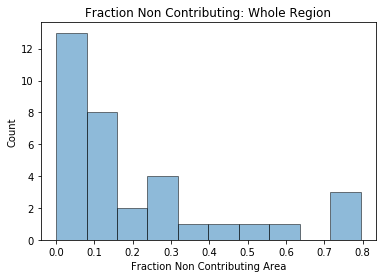

In [17]:
#visualize non-contributing areas across basins in eastern cluster

fig, ax = plt.subplots()
ax.hist(eastern_frac, alpha = 0.5, edgecolor = 'k')
ax.set_xlabel('Fraction Non Contributing Area')
ax.set_ylabel('Count')
ax.set_title('Fraction Non Contributing: Whole Region')
plt.show()

In [19]:
eastern_with_non = eastern_frac[np.squeeze(np.argwhere(eastern_frac > 0))]
print('Number of stations without non-contributing areas: ' + str(len(np.argwhere(eastern_with_non==0))))
print('Min fraction of non-contributing areas:  ' + str(np.min(eastern_with_non)))
print('Max fraction of non-contributing areas:  ' + str(np.max(eastern_with_non))[:4])
print('Mean fraction of non-contributing areas: ' + str(np.mean(eastern_with_non))[:4])

Number of stations without non-contributing areas: 0
Min fraction of non-contributing areas:  0.013029598052818425
Max fraction of non-contributing areas:  0.79
Mean fraction of non-contributing areas: 0.23
